In [1]:
import geopandas as gpd, warnings, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from types_data.utils import create_dir, cols_dataref
warnings.filterwarnings('ignore')





In [2]:
dist_data = gpd.read_file("../Data/gjson/adm_3.geojson").sort_values('area')
intenrt_data = gpd.read_file('../Data/gjson/okkla/ookla_intenet.geojson')

In [3]:
def calculate_metric(df, col, name, metrics = [np.mean, np.std, np.sum]):
    stats = df[col].agg(metrics).values.flatten()
    result = {
        "Name": [name],
        "Mean": [stats[0]],
        "STD": [stats[1]],
        "Sum": [stats[2]]
    }
    result =  pd.DataFrame(result)
    return result

In [4]:
intenrt_data.columns

Index(['quadkey', 'avg_d_kbps', 'avg_u_kbps', 'avg_lat_ms', 'tests', 'devices',
       'index_right', 'id', 'fnid', 'name', 'unit_type_code', 'parent_id',
       'start_date', 'end_date', 'country_code', 'fewsnet_region',
       'geographic_group', 'full_name', 'es_name', 'fr_name', 'pt_name',
       'ar_name', 'unit_type', 'country', 'admin_0', 'admin_1', 'admin_2',
       'admin_3', 'admin_4', 'layer_id', 'layer_name',
       'geographicunitsetversion_name', 'zone_type', 'urban_rural',
       'start_month', 'area', 'attributes', 'fid', 'geometry'],
      dtype='object')

In [5]:
internet = intenrt_data[[ 'avg_d_kbps', 'avg_u_kbps', 'geometry']]

id	 [223347] 
Grids inside:  0


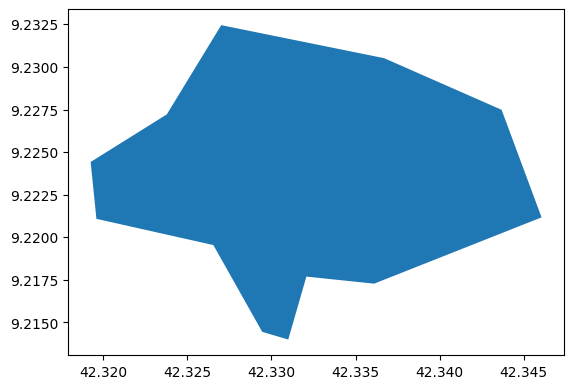

In [6]:
sample = dist_data.iloc[0:1]
sample = dist_data.sample(1)
# sample.plot()
area = gpd.sjoin(internet, sample, op='within')
narea = len(area)

print("id\t", sample['id'].values, "\nGrids inside: ", narea)
try:

    sample.plot()
    area.plot(ax=plt.gca(), edgecolor = 'red')
except:
    pass
# internet_d = calculate_metric(area, 'avg_d_kbps', 'Internet Speed (kbps) - Download')

ValueError: aspect must be finite and positive 

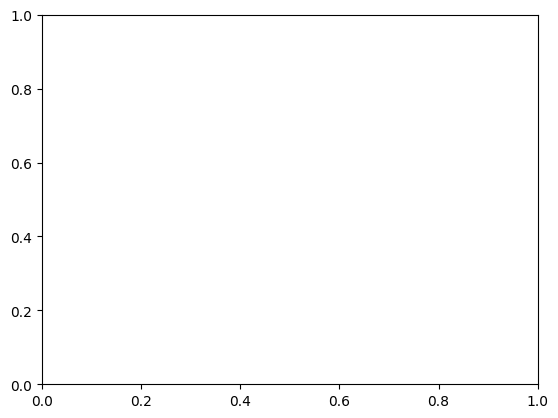

In [7]:
area.plot()

<Axes: >

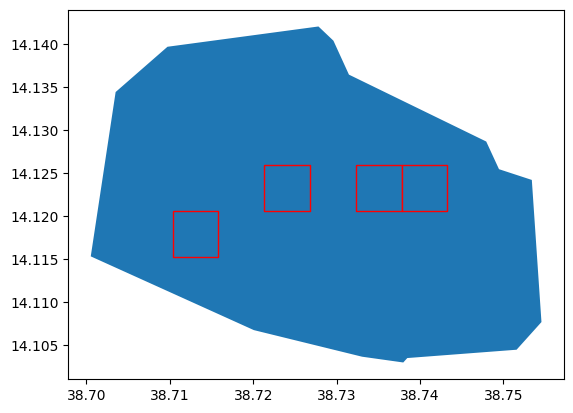